In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import lambertw
from mpl_toolkits import mplot3d
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

[1]
1


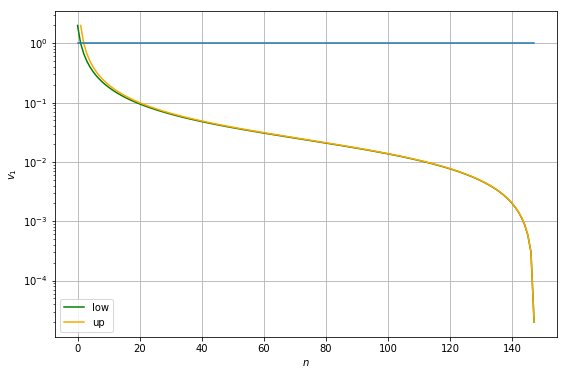

In [2]:
# some givens
slack_eps = 1.0
N = 1035.0
C0 = 1.0

n = np.arange(int(N))
n_bis = np.arange(1,int(N))
k = np.arange(int(N))

C_1 = ( 6*(N**2)*slack_eps - C0*(n+1)*(2*n+1)*n ) / (N*(N-n)*(N+1+n) )
v_1 = C_1/3 * N/(1+k) / C0
v_1_bis = C_1[1:]/3 * N/n_bis / C0
indices_1 = n[v_1>0]
ok_indices_1 = k[(v_1<=1) & (v_1>0)]
indices_1_bis = n_bis[v_1_bis>0]
ok_indices_1_bis = n_bis[(v_1_bis>1)]

print(np.intersect1d(ok_indices_1,ok_indices_1_bis))
print(ok_indices_1[0])
plt.figure(figsize=(9,6))
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$v_1$')
plt.semilogy(indices_1,v_1[v_1>0],color='green')
plt.semilogy(indices_1_bis,v_1_bis[v_1_bis>0],color='orange')
plt.semilogy(indices_1,np.ones(len(indices_1)))
plt.legend(['low','up']);

In [3]:
# fun practical
def Nb_try(slack_eps,N=250.0,C0=1.0):
    n = np.arange(int(N))
    k = np.arange(int(N))
    C_1 = ( 6*(N**2)*slack_eps - C0*(n+1)*(2*n+1)*n ) / (N*(N-n)*(N+1+n) )
    arg_lhs = C_1/3 * N/(1+k) / C0
    arg_rhs = 1
    ok_indices_1 = n[arg_rhs>=arg_lhs]
    if len(ok_indices_1) > 0:
        return ok_indices_1[0]
    else:
        return N

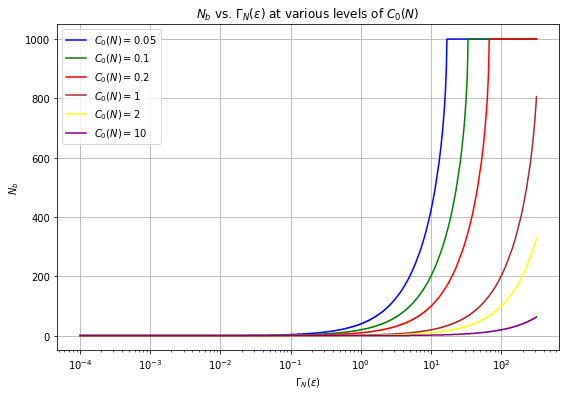

In [4]:
N = 1000.0

plt.figure(figsize=(9,6))

plt.grid()
plt.title('$N_b$ vs. $\Gamma_N(\epsilon)$ at various levels of $C_0(N)$')

vector2 = np.logspace(-4,2.5,2000)

C0 = 0.05

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='blue');

C0 = 0.1

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='green');

C0 = 0.2

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='red');

C0 = 1

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='brown');

C0 = 2

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='yellow');

C0 = 10

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='purple');



plt.legend(['$C_0(N) = 0.05$','$C_0(N) = 0.1$','$C_0(N) = 0.2$','$C_0(N)= 1$','$C_0(N) = 2$','$C_0(N) = 10$'])
plt.xlabel('$\Gamma_N(\epsilon)$')
plt.ylabel('$N_b$');
plt.savefig('Nb21_log.pdf')

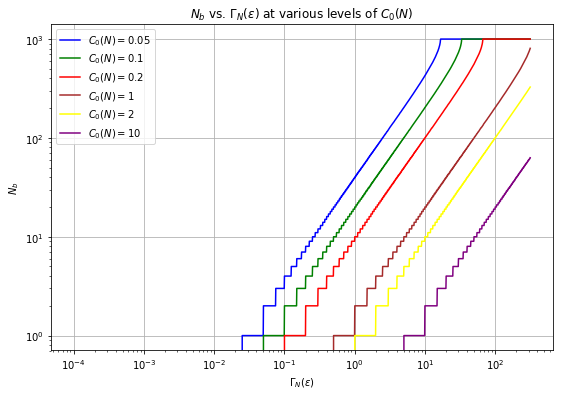

In [5]:
N = 1000.0

plt.figure(figsize=(9,6))

plt.grid()
plt.title('$N_b$ vs. $\Gamma_N(\epsilon)$ at various levels of $C_0(N)$')

vector2 = np.logspace(-4,2.5,2000)

C0 = 0.05

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.loglog(vector2,vals_threshold,color='blue');

C0 = 0.1

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.loglog(vector2,vals_threshold,color='green');

C0 = 0.2

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.loglog(vector2,vals_threshold,color='red');

C0 = 1

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.loglog(vector2,vals_threshold,color='brown');

C0 = 2

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.loglog(vector2,vals_threshold,color='yellow');

C0 = 10

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.loglog(vector2,vals_threshold,color='purple');


plt.legend(['$C_0(N) = 0.05$','$C_0(N) = 0.1$','$C_0(N) = 0.2$','$C_0(N)= 1$','$C_0(N) = 2$','$C_0(N) = 10$'])
plt.xlabel('$\Gamma_N(\epsilon)$')
plt.ylabel('$N_b$');
plt.savefig('Nb21_loglog.pdf')

283
percentage at 750 | val = 21.302732670853786 %
best FGD: 2002544296.2960553 at 389
best FGD constant: 2537150216.166811
 
q-measure: 534605919.8707557
relative q-measure: 21.071118157065662 %
 


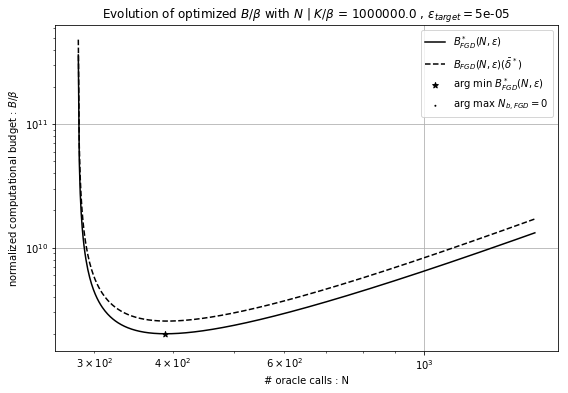

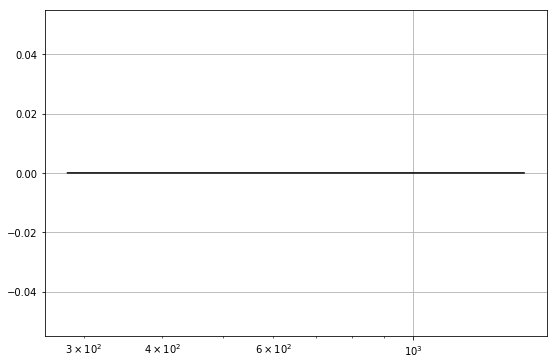

In [43]:
K_div_beta = 1e6
N_max = 1500 # should be infinity 
multi = 1
eps_target = 0.00005

plt.figure(figsize=(9,6))

plt.grid()

vector_N_attempt = np.arange(N_max)+1

C0 = lambda N: 1
gamma = lambda N: 1
div = lambda N: N**2 / 4

gamma_eps = np.array([eps_target - gamma(N_elem)*multi/div(N_elem) for N_elem in vector_N_attempt])
N_min = int(vector_N_attempt[gamma_eps>0][0])
print(N_min)

vector_N = np.arange(N_min,N_max)

vals = [(Nb_try(eps_target - gamma(N_elem)*multi/div(N_elem),N_elem,C0(N_elem)),N_elem) for N_elem in vector_N]
vals_threshold = np.array([np.max((0,np.min((Nb_elem[1],Nb_elem[0])))) for Nb_elem in vals])

B_list = []
Nb_list_FGD = []
B_list_constant = []
bar_delta_list = []
cond = True
value_pre_switch = np.inf
N_pre_switch = 0

N_echantillon = int(N_max/2)
echantillon_FGD = 0
echantillon_FGD_constant = 0

for index_N in np.arange(len(vector_N)):
    
    N = float(vector_N[index_N])
    Nb = int(vals_threshold[index_N])
    Nb_list_FGD.append(Nb)
    k = np.arange(int(N))
    k_prime = np.arange(Nb,int(N))
    C = ( 6*(N**2)*(eps_target-gamma(N)*multi/div(N)) - C0(N)*(Nb+1)*(2*Nb+1)*Nb ) / (N*(N-Nb)*(N+1+Nb) ) / (3*np.sqrt(C0(N)))
    delta_sched = np.concatenate((np.ones(Nb),C/np.sqrt(C0(N))*(N)/(1+k_prime)),axis=0)
    value = N*K_div_beta + np.sum(1/delta_sched - 1)
    B_list.append(value)
    bar_delta = np.min((1,(eps_target-gamma(N)*multi/div(N))*(6*N)/(C0(N)*(N+1)*(2*N+1))))
    bar_delta_list.append(bar_delta)
    if Nb>0 and cond:
        N_pre_switch = N-1
        cond = False
        value_pre_switch = B_list[-2]
    value_constant = N*K_div_beta+N*(1/bar_delta - 1)
    B_list_constant.append(value_constant)
    if N==N_echantillon:
        echantillon_FGD = value
        echantillon_FGD_constant = value_constant
    
N_best = vector_N[np.argmin(np.array(B_list))]
plt.loglog(vector_N,np.array(B_list),color='black')
plt.loglog(vector_N,np.array(B_list_constant),color='black',linestyle='--');
plt.scatter([N_best],[np.min(np.array(B_list))],color='black',marker='*')
plt.scatter([N_pre_switch],[value_pre_switch],color='black',marker='o');
best_FGD = np.min(np.array(B_list))
best_FGD_constant = np.min(B_list_constant)
print('percentage at '+str(N_echantillon)+' | val = '+str(100*(1-echantillon_FGD/echantillon_FGD_constant))+' %')
print('best FGD: '+str(best_FGD)+' at '+str(N_best))
print('best FGD constant: '+str(best_FGD_constant))
print(' ')
print('q-measure: '+str(best_FGD_constant-best_FGD))
print('relative q-measure: '+str(100*(1-best_FGD/best_FGD_constant))+' %')
print(' ')


plt.title('Evolution of optimized $B / $'+r'$\beta$'+' with $N$ | $K / $'+r'$\beta$ = '+str(K_div_beta)+' , $\epsilon_{target} = $'+str(eps_target))
plt.xlabel('# oracle calls : N')
plt.ylabel('normalized computational budget : $B / $'+r'$\beta$')
plt.legend(['$B_{FGD}^*(N,\epsilon)$','$B_{FGD}(N,\epsilon)'+r'(\bar{\delta}^*)$',\
            'arg min $B^*_{FGD}(N,\epsilon)$','arg max $N_{b,FGD}=0$']);
plt.savefig('results21_'+'KdivBeta'+str(K_div_beta)+'EpsilonTarget'+str(eps_target)+'.pdf')

plt.figure(figsize=(9,6))
plt.semilogx(vector_N,Nb_list_FGD,color='black')
plt.grid();